In [ ]:
# data 확인!
!ls -al

total 16
drwxr-xr-x 1 root root 4096 Jan  7 14:33 .
drwxr-xr-x 1 root root 4096 Jan 21 07:09 ..
drwxr-xr-x 4 root root 4096 Jan  7 14:33 .config
drwxr-xr-x 1 root root 4096 Jan  7 14:33 sample_data


In [ ]:
# Python 캐글 설치
!pip install kaggle

In [ ]:
# kaggle. json key file 업로드
from google.colab import files
files.upload()

# path
# C:\Users\gksxo\Desktop\Folder\순천향대학교\GDSC\캐글 API 토큰

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maninblack","key":"8bb769c984f16315fdf92cab4351f4c8"}'}

In [ ]:
# 캐글 데이터셋 불러오기전 세팅
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/ # json file 이동
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         78           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        115           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        875           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        176           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1882           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      13681            True  
house-pr

In [ ]:
# 세팅 확인
!ls ~/.kaggle

kaggle.json


In [ ]:
# 데이터 불러오기전 확인
!ls -al

total 20
drwxr-xr-x 1 root root 4096 Jan 21 07:59 .
drwxr-xr-x 1 root root 4096 Jan 21 07:45 ..
drwxr-xr-x 4 root root 4096 Jan  7 14:33 .config
-rw-r--r-- 1 root root   66 Jan 21 07:59 kaggle.json
drwxr-xr-x 1 root root 4096 Jan  7 14:33 sample_data


In [ ]:
# 데이터 불러오기
!kaggle datasets download -d alessiocorrado99/animals10?select=raw-img

 99% 580M/586M [00:04<00:00, 118MB/s]
100% 586M/586M [00:04<00:00, 126MB/s]


In [ ]:
# 불러온 데이터 확인
!ls -al

total 599720
drwxr-xr-x 1 root root      4096 Jan 21 07:59 .
drwxr-xr-x 1 root root      4096 Jan 21 07:45 ..
-rw-r--r-- 1 root root 614087302 Jan 21 08:00 animals10.zip
drwxr-xr-x 4 root root      4096 Jan  7 14:33 .config
-rw-r--r-- 1 root root        66 Jan 21 07:59 kaggle.json
drwxr-xr-x 1 root root      4096 Jan  7 14:33 sample_data


In [ ]:
# 불러온 데이터 압축 풀기
!unzip animals-detection-images-dataset.zip

In [ ]:
# 압축 풀기 확인
!ls -al

total 9351000
drwxr-xr-x  1 root root       4096 Jan 21 04:48 .
drwxr-xr-x  1 root root       4096 Jan 21 04:36 ..
-rw-r--r--  1 root root 9575388685 Jan 21 04:47 animals-detection-images-dataset.zip
drwxr-xr-x  4 root root       4096 Jan  7 14:33 .config
-rw-r--r--  1 root root         66 Jan 21 04:44 kaggle.json
drwxr-xr-x  1 root root       4096 Jan  7 14:33 sample_data
drwxr-xr-x 82 root root       4096 Jan 21 04:48 test
drwxr-xr-x 82 root root       4096 Jan 21 04:51 train


In [ ]:
!ls ./test

 Bear	       Elephant       Koala		       Penguin	     Snake
'Brown bear'   Fish	      Ladybug		       Pig	     Sparrow
 Bull	       Fox	      Leopard		      'Polar bear'   Spider
 Butterfly     Frog	      Lion		       Rabbit	     Squid
 Camel	       Giraffe	      Lizard		       Raccoon	     Squirrel
 Canary        Goat	      Lynx		       Raven	     Starfish
 Caterpillar   Goldfish       Magpie		      'Red panda'    Swan
 Cattle        Goose	      Monkey		       Rhinoceros    Tick
 Centipede     Hamster	     'Moths and butterflies'   Scorpion      Tiger
 Cheetah      'Harbor seal'   Mouse		       Seahorse      Tortoise
 Chicken       Hedgehog       Mule		      'Sea lion'     Turkey
 Crab	       Hippopotamus   Ostrich		      'Sea turtle'   Turtle
 Crocodile     Horse	      Otter		       Shark	     Whale
 Deer	       Jaguar	      Owl		       Sheep	     Woodpecker
 Duck	       Jellyfish      Panda		       Shrimp	     Worm
 Eagle	       Kangaroo       Parrot		       Snail	     Zebra


In [ ]:
# 라이브러리
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [ ]:
# 동물 폴더명 이름 추출
TARGET_DIR = "/content/train"
folder_names = os.listdir(TARGET_DIR)

# 폴더명 출력
for i, folder in enumerate(folder_names):
  if i%5 != 0: print(folder, end="\t\t")
  else: print(folder)

Canary
Ladybug		Koala		Pig		Moths and butterflies		Deer
Tick		Turtle		Shark		Sea turtle		Snake
Fox		Snail		Tortoise		Hamster		Raven
Zebra		Panda		Horse		Owl		Whale
Kangaroo		Seahorse		Centipede		Rabbit		Lion
Turkey		Scorpion		Giraffe		Otter		Goat
Squirrel		Sheep		Hippopotamus		Chicken		Butterfly
Polar bear		Shrimp		Lynx		Duck		Squid
Cheetah		Brown bear		Swan		Starfish		Sea lion
Cattle		Worm		Jaguar		Frog		Elephant
Jellyfish		Goldfish		Parrot		Bear		Mouse
Tiger		Ostrich		Lizard		Penguin		Caterpillar
Raccoon		Hedgehog		Spider		Rhinoceros		Goose
Mule		Fish		Crab		Red panda		Bull
Camel		Monkey		Leopard		Woodpecker		Sparrow
Crocodile		Magpie		Harbor seal		Eagle		

In [ ]:
# 호랑이 *.txt 개수 확인
!find ./test/Tiger -name "*.txt" | wc -l

# 호랑이 *.jpg 개수 확인
!find ./test/Tiger -name "*.jpg" | wc -l

# 라쿤 *.txt 개수 확인
!find ./test/Raccoon -name "*.txt" | wc -l

# 라쿤 *.jpg 개수 확인
!find ./test/Raccoon -name "*.jpg" | wc -l

26
26
51
51


In [ ]:
# 라벨 데이터 확인
print("003f38058fbe4fb3.jpg")

TIGER_LABEL_DIR = "/content/train/Tiger/Label"
!cat /content/train/Tiger/Label/003f38058fbe4fb3.txt

003f38058fbe4fb3.jpg
Tiger 85.999945 314.99980800000003 484.999666 924.9996800000001


In [ ]:
from os import walk
import shutil # 파일 이동

def createFolder(directory):
    """ 폴더 생성 코드 """
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)


def make_new_folder(input_type="train"):
  """새로운 이미지 폴더를 생성합니다.
     기존의 데이터를 옮기는 작업입니다.
  """
  # 새로운 폴더 생성
  createFolder(f"./new_{input_type}")

  TARGET_DIR = f"/content/{input_type}/"
  folder_names = os.listdir(TARGET_DIR)

  data_dict = {}
  for animal in folder_names:
      # 동물 폴더 각가의 동물
      data_dict[animal] = {} # 동물별 저장
      for i, (_, _, files_jgp_or_txt) in enumerate(walk(TARGET_DIR + animal)):
        if i == 0:
          data_dict[animal]["jpg"] = sorted(files_jgp_or_txt)
          break

  data = []
  for animal in data_dict:
    LABEL_PATH = f"/content/{input_type}/{animal}/"
    make_folder_path = f"/content/new_{input_type}/"

    createFolder(make_folder_path)

    for jpg_file_nmae in data_dict[animal]["jpg"]:
      JPG_FILE_PATH = LABEL_PATH + jpg_file_nmae
      # 파일 옮기기
      # print(make_folder_path + jpg_file_nmae, make_folder_path)
      shutil.move(LABEL_PATH + jpg_file_nmae, make_folder_path + jpg_file_nmae)
      data.append((jpg_file_nmae, animal))

  return pd.DataFrame(data, columns=['file_name', 'category'])

In [ ]:
# 폴더 옮기고 데이터 프레임 생성
orgin_train_df = make_new_folder("train")
orgin_test_df = make_new_folder("test")

In [ ]:
orgin_train_df["label"] = pd.factorize(orgin_train_df["category"])[0] + 1
orgin_train_df.drop_duplicates(subset = ["label"]).to_csv("model.csv", mode='w')

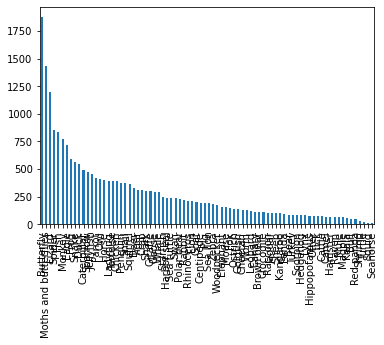

In [ ]:
orgin_train_df['category'].value_counts().plot.bar()

In [ ]:
# 카테고리 범주
len(pd.unique(orgin_train_df['category']))

80

In [ ]:
orgin_train_df['category']

0        Canary
1        Canary
2        Canary
3        Canary
4        Canary
          ...  
22561     Eagle
22562     Eagle
22563     Eagle
22564     Eagle
22565     Eagle
Name: category, Length: 22566, dtype: object

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D , Dropout , Flatten, Dense, Activation, BatchNormalization

IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

model = Sequential()

model.add(Conv2D(32, (3, 3),activation='relu',input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(80, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [ ]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [ ]:
train_df, validate_df = train_test_split(
    orgin_train_df, 
    test_size=0.20, 
    random_state=42
    )

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True) #데이터 프레임 내에서 인덱스만들기

print(train_df, validate_df)

#shape[0]은 행의 개수임 why? 2차원 리스트의 shape는 (행,열) 형태의 튜플로 반환되기 때문
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

                  file_name               category
0      997908ede60ce519.jpg                   Crab
1      a2333e8c457386b8.jpg                  Whale
2      76128f2da53233d7.jpg                  Snake
3      1c77407a3bca077a.jpg                   Goat
4      41bbbc51c5ce45c3.jpg            Harbor seal
...                     ...                    ...
18047  c81a481823ad4853.jpg               Starfish
18048  783e2f83cedb9364.jpg                 Magpie
18049  effd6a7c9875fe24.jpg                  Horse
18050  04bb3b2efdfc5bd2.jpg  Moths and butterflies
18051  a95343cc4491ce7e.jpg                 Lizard

[18052 rows x 2 columns]                  file_name     category
0     a0b0702933c6d3b4.jpg    Butterfly
1     9f988fccae93a358.jpg  Harbor seal
2     42e7747b24ae4942.jpg  Harbor seal
3     333d42e05c6ffc78.jpg        Snake
4     043ea1489c1e97f9.jpg     Goldfish
...                    ...          ...
4509  02b3690baaf911b8.jpg     Squirrel
4510  23f4e5bec84f29e1.jpg         Fish
45

In [ ]:
batch_size=15

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "./new_train/", 
    x_col='file_name',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 18052 validated image filenames belonging to 80 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./new_train/", 
    x_col='file_name',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 4514 validated image filenames belonging to 80 classes.


Found 1 validated image filenames belonging to 1 classes.
example_generator type : <class 'keras.preprocessing.image.DataFrameIterator'>


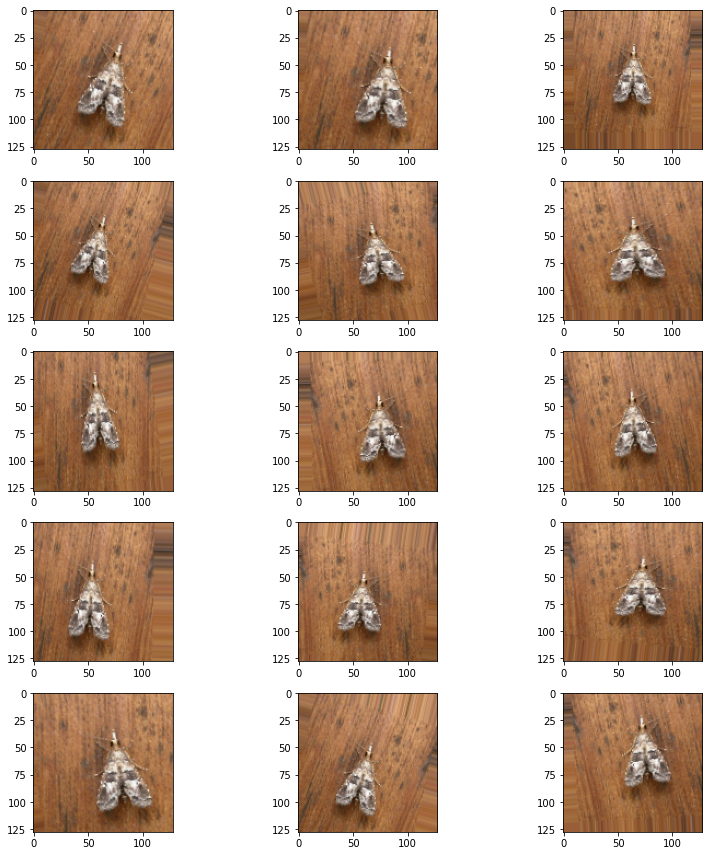

In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)
# train_df 에서 임의의 데이터 1개 추출

# train_datagen데이터 형으로 만들어진 데이터를
# 임의로 1개 불러오기
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "./new_train/", 
    x_col='file_name',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)
print("example_generator type :", type(example_generator))

plt.figure(figsize=(12, 12)) # 사진 시각화 layout
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        #  이미지 배열 형태의 데이터 > X_batch, Y_batch
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# 이미지 15개인 이유 > batch_size = 15 때문에?

In [ ]:
FAST_RUN = False
epochs=1 if FAST_RUN else 50


epochs=1
# 모델 학습
# 제네레이터로 생성된 배치로 학습시킬 경우 fit() 대신 fit_generator() 함수를 사용
history = model.fit_generator(
    train_generator, 
    epochs=epochs, # 반복횟수
    validation_data=validation_generator, # validation 데이터 셋
    validation_steps=total_validate//batch_size, # 검증 데이터를 일정 비율로 나눠서 메모리로
    steps_per_epoch=total_train//batch_size, # 매 epoch 마다 일정 비율로 나눠서 메모리로
    callbacks=callbacks
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


1203/1203 [==============================] - 419s 348ms/step - loss: 4.2952 - accuracy: 0.1032 - val_loss: 3.9508 - val_accuracy: 0.1189 - lr: 0.0010


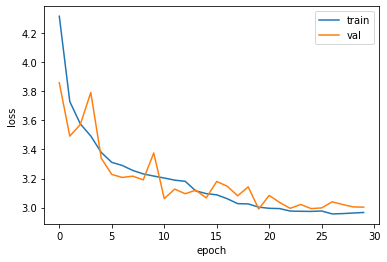

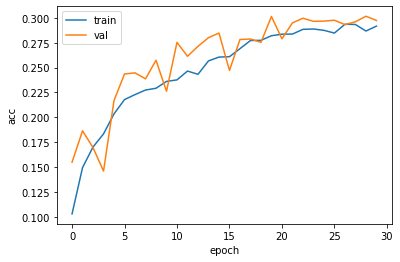

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train','val'])
plt.show()

In [ ]:
test_dir = os.listdir("./new_test") # test 경로

# 이미지 경로만 있는df
test_df = pd.DataFrame({ 
    'file_name': test_dir
})
nb_samples = test_df.shape[0]

test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    orgin_test_df, 
    "./new_test/", 
    x_col='file_name',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 6505 validated image filenames.


In [ ]:
# 예측
predict = model.predict(test_generator)
print(len(predict))

6505


In [ ]:
orgin_test_df['category'] = np.argmax(predict, axis=-1) # 정답이라고 예측하는 것을 택함
print(orgin_test_df.head())

              file_name  category
0  01d4fc65683b0798.jpg        33
1  0dc66ee65d3e9b3d.jpg         3
2  0ebf7bb90c689045.jpg         3
3  10d0d782f3e71a79.jpg        33
4  1765e1a7d16d0a2e.jpg        47


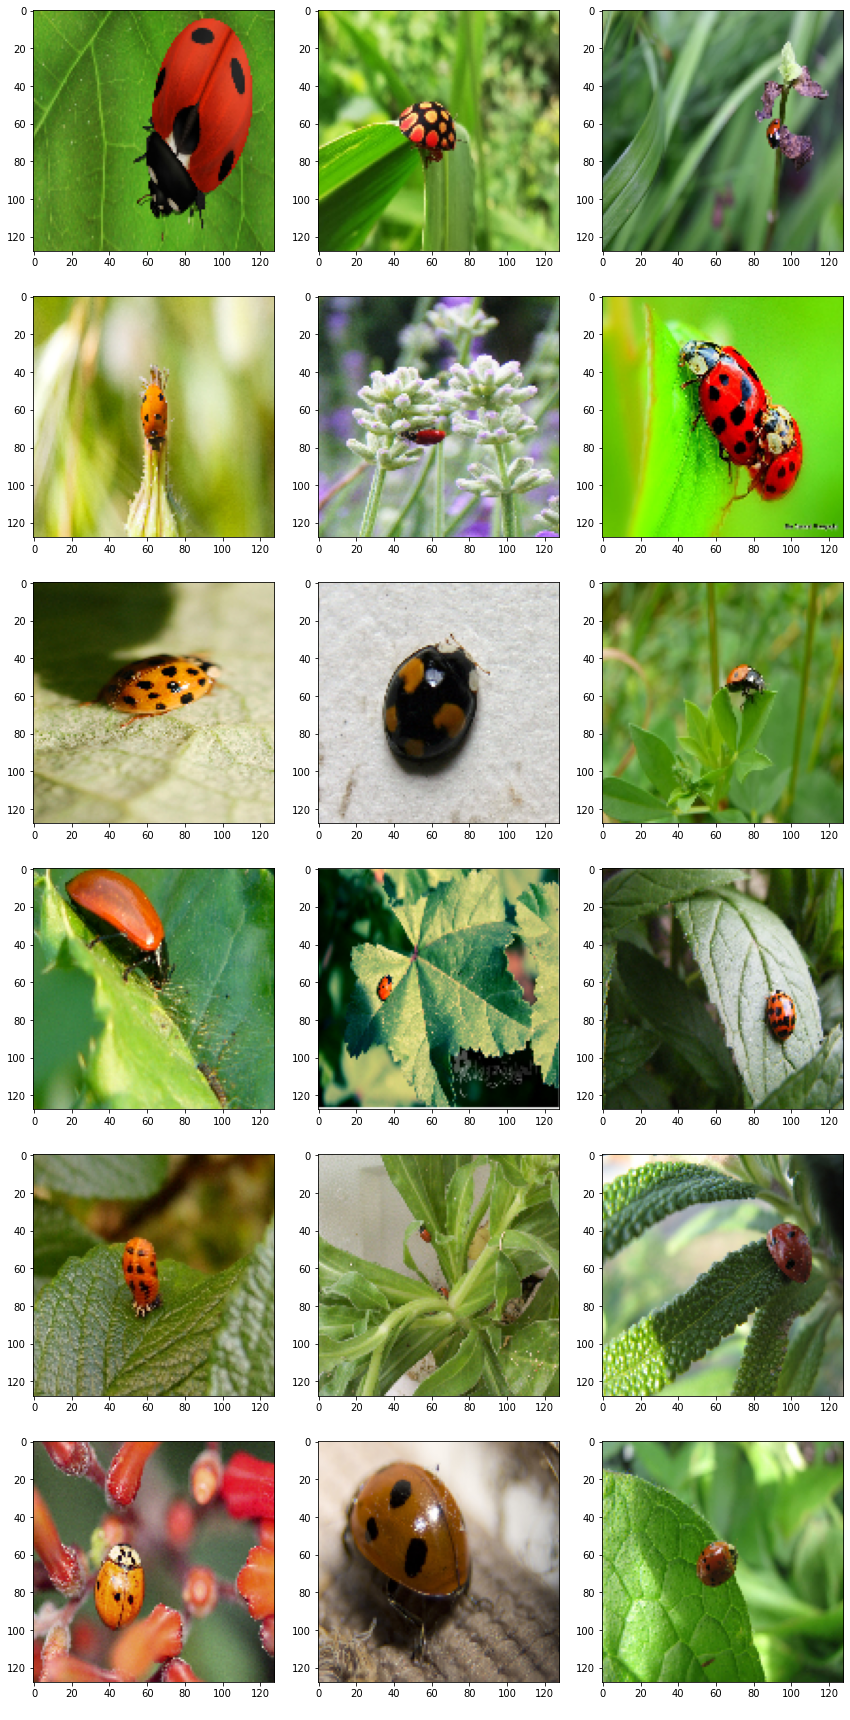

In [ ]:
sample_test = orgin_test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['file_name']
    category = row['category']
    img = load_img("./new_test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')', color="white")
plt.tight_layout()
plt.show()

In [ ]:
orgin_test_df

,file_name,category
0,01d4fc65683b0798.jpg,33
1,0dc66ee65d3e9b3d.jpg,3
2,0ebf7bb90c689045.jpg,3
3,10d0d782f3e71a79.jpg,33
4,1765e1a7d16d0a2e.jpg,47
...,...,...
6500,e33971160af7afe3.jpg,14
6501,e717d02f59ac3f52.jpg,17
6502,f7d0377da56614b0.jpg,17
6503,fd9925adfb7203e5.jpg,30


In [ ]:
!ls -al

total 1040
drwxr-xr-x 1 root root    4096 Jan 18 09:54 .
drwxr-xr-x 1 root root    4096 Jan 18 09:52 ..
-rw-r--r-- 1 root root 1048576 Jan 18 09:54 animal_030P.h5
drwxr-xr-x 4 root root    4096 Jan  7 14:33 .config
drwxr-xr-x 1 root root    4096 Jan  7 14:33 sample_data


In [ ]:
# 텐서플로우 라이트 저장
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp6_c6wxmt/assets


INFO:tensorflow:Assets written to: /tmp/tmp6_c6wxmt/assets


In [ ]:
!ls -al

total 9403916
drwxr-xr-x  1 root root       4096 Jan 18 10:56 .
drwxr-xr-x  1 root root       4096 Jan 18 09:52 ..
-rw-r--r--  1 root root    1048576 Jan 18 09:54 animal_030P
-rw-r--r--  1 root root 9575388685 Jan 18 10:01 animals-detection-images-dataset.zip
drwxr-xr-x  4 root root       4096 Jan  7 14:33 .config
drwxr-xr-x  2 root root       4096 Jan 18 09:57 .ipynb_checkpoints
-rw-r--r--  1 root root         66 Jan 18 09:58 kaggle.json
-rw-r--r--  1 root root   51926872 Jan 18 10:56 model.tflite
drwxr-xr-x  2 root root     258048 Jan 18 10:05 new_test
drwxr-xr-x  2 root root     946176 Jan 18 10:05 new_train
drwxr-xr-x  1 root root       4096 Jan  7 14:33 sample_data
drwxr-xr-x 82 root root       4096 Jan 18 10:02 test
drwxr-xr-x 82 root root       4096 Jan 18 10:05 train
